<a href="https://colab.research.google.com/github/pagrkonecta/Konecta_Test/blob/main/Konecta_Test_PAGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


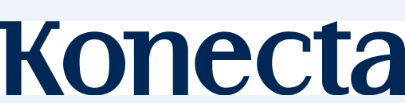

#**TECHNICAL TEST FOR THE SELECTION PROCESS OF THE COMPANY KONECTA**
#**---------------ANALYST DATA SCIENTIST---------------**

#Paola Andrea Giraldo Ramírez 
#Environmental Engineer
#March 2023

# Problem to be solved
In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency was expected to peak in the third quarter  of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit cards for consumption and accumulated heavy credit and cash–card debts. The crisis caused a blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

## Dataset

This data were colected between April and September 2005, from an importan bank in Taiwan which issues both cash and credit cards. The researchers used a binary variable to represent default payment, where Yes was coded as 1 and No was coded as 0. This variable was considered the response variable in the study. The dataset contains 30000 total number of instances. The data will be download and imported from UCI ML repository: 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 


### Variables

This dataset has 24 variables, in which 23 are explanatory variables, and one which is the variable to be predicted some are user personal information, other related with amount of bill statement and the amount of previous payment in a specific month. Each variable will be described below: 
_______________________________________________
*Variable to be predicted:*

*   **default payment next month**: Refers to credit card holders are defaulters or non-defaulters (1 = yes; 0 = no)

_______________________________________________
*User personal information:*

*   **ID**: Identity of each client (From 1 to 3000) - Categorical variable.
*   **LIMIT_BAL**: Total credit (Between 1000 and 1000000, given in Taiwan Dollars) it includes both the individual consumer credit and his/her family (supplementary) credit.
*   **SEX**: Gender (1 = Male; 2 = Female) - Categorical variable.
*   **EDUCATION**: Level of education (1 = Graduate school; 2 = University; 3 = High school; 4 = Others).
*   **MARRIAGE**: Marital status (0 = Unknown; 1 = married; 2 = single; 3 = others) - Categorical variable.
*   **AGE**: Age in years - Numerical variable.

_______________________________________________
*History of past payments (This variables track the past monthly payment records, i.e. the delay of the payment referred to a specific month):* 

*   **PAY_0**: Repayment status in September  
*   **PAY_2**: Repayment status in August
*   **PAY_3**: Repayment status in July
*   **PAY_4**: Repayment status in June
*   **PAY_5**: Repayment status in May
*   **PAY_6**: Repayment status in April

*(The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)*


_______________________________________________
*Amount of bill statement:*

*   **BILL_AMT1**: Amount of bill statement in September
*   **BILL_AMT2**: Amount of bill statement in August
*   **BILL_AMT**: Amount of bill statement in July
*   **BILL_AMT4**: Amount of bill statement in Jun
*   **BILL_AMT5**: Amount of bill statement in May
*   **BILL_AMT6**: Amount of bill statement in April

*(New Taiwan dollar)*


_______________________________________________
*amount of previous payment:*

*   **PAY_AMT1**: Amount of previous payment in September
*   **PAY_AMT2**: Amount of previous payment in August
*   **PAY_AMT3**: Amount of previous payment in July
*   **PAY_AMT4**: Amount of previous payment in June
*   **PAY_AMT5**: Amount of previous payment in May
*   **PAY_AMT6**: Amount of previous payment in April

*(New Taiwan dollar)*



# Solution

### Import libraries/packages

In [22]:
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Preprocessing and modeling
# ==============================================================================
#from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

# Conect to Colab 
# ==============================================================================
from google.colab import drive
from google.colab import files

## Data

### Download data

In [32]:
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls", skiprows = [0])
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data cleaning and preprocessing

In [33]:
df = df.drop(axis=1, columns='ID')
df.reset_index()
df['DEFAULT'] = df['default payment next month'].astype('category')
df = df.drop(axis=1, columns='default payment next month')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

EDUCATION and MARRIAGE Contains more categories than those described in the repository where the information was obtained.

In [39]:
df['EDUCATION']. unique()

array([2, 1, 3, 5, 4, 6, 0])

For variable EDUCATION, values = 0, 5 and 6 were not described in the dataset information, therefore they will be considered within the category 'Others'.

In [40]:
df['MARRIAGE']. unique()

array([1, 2, 3, 0])

Similar to the previous analysis, the MARRIAGE variable does not have an associated category for the value 0, therefore it will be included in the 'Others' category.

In [ ]:
df.replace(['30days','35days'],'40days')

<Axes: >

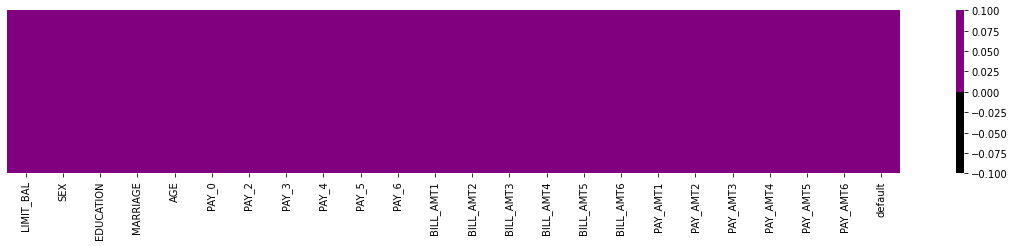

In [30]:
plt.figure(figsize=(20, 3))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap=ListedColormap(['black','purple']))

The dataset does not contain null values, therefore it is not necessary to impute the data.